# **Carregar e tratar os dados**

In [1]:
#Bibliotecas Necessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Dados de 2013
exportacoes2013 = 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/mun/EXP_2013_MUN.csv'

#Tabelas para tradução dos codigos
mun = 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF_MUN.csv'
sh4 = 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM_SH.csv'
pais = 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv'

#Leitura da tabela 2013 e tabelas de codigos
df = pd.read_csv(exportacoes2013, sep=";", encoding="latin1")
df_mun = pd.read_csv(mun, sep=";", encoding="latin1", usecols=['CO_MUN_GEO', 'NO_MUN'])
df_sh4 = pd.read_csv(sh4, sep=';', encoding='latin-1', usecols=['CO_SH4', 'NO_SH4_POR'])
df_pais = pd.read_csv(pais, sep=";",encoding="latin1", usecols=['CO_PAIS', 'NO_PAIS'])

#Renomear colunas antes de mesclar dados para compatibilidade
df_mun = df_mun.rename(columns={"CO_MUN_GEO": "CO_MUN"})
df_sh4 = df_sh4.rename(columns={"CO_SH4": "SH4", "NO_SH4_POR": "PRODUTO"})

#Remover duplicatas de sh4
df_sh4 = df_sh4.drop_duplicates(subset=["SH4"])

#Mesclar DF
df_mescla = df.merge(df_mun, on=["CO_MUN"], how="left")
df_mescla = df_mescla.merge(df_sh4, on=["SH4"], how="left")
df_mescla = df_mescla.merge(df_pais, on=["CO_PAIS"], how="left")

#Criando coluna valor agregado
df_mescla["VALOR_AGREGADO"] = df_mescla["VL_FOB"] / df_mescla["KG_LIQUIDO"]

#Tratar casos onde KG_LIQUIDO é zero para evitar divisão por zero
df_mescla = df_mescla[df_mescla["KG_LIQUIDO"] > 0].reset_index()
display(df_mescla.head())

#Renomear Colunas
df_mescla = df_mescla.rename(columns ={'CO_ANO': 'ANO', 'CO_MES': 'MES', 'SG_UF_MUN': 'UF', 'NO_MUN': 'MUN', 'NO_PAIS': 'PAIS' })

#Filtrar UF para SP
df_mescla = df_mescla.loc[df_mescla['UF'] == 'SP']

,index,CO_ANO,CO_MES,SH4,CO_PAIS,SG_UF_MUN,CO_MUN,KG_LIQUIDO,VL_FOB,NO_MUN,PRODUTO,NO_PAIS,VALOR_AGREGADO
0,0,2013,6,8501,63,PR,4106902,780,76547,CURITIBA,"Motores e geradores, elétricos, exceto os grup...",Argentina,98.137179
1,1,2013,6,9503,586,SC,4213203,886,9277,POMERODE,Outros brinquedos; modelos reduzidos e modelos...,Paraguai,10.470655
2,2,2013,6,207,403,SC,4208203,1216585,2266251,ITAJAI,"Carnes e miudezas comestíveis, frescas, refrig...",Jordânia,1.862797
3,3,2013,6,8511,158,SP,3438709,166,4060,PIRACICABA,Aparelhos e dispositivos elétricos de ignição ...,Chile,24.457831
4,4,2013,6,8409,97,RS,4305108,46,1637,CAXIAS DO SUL,Partes reconhecíveis como exclusiva ou princip...,Bolívia,35.586957


# **Pesquisar Top 10 Destino de Exportações por Município**

Digite o nome do município: sao paulo


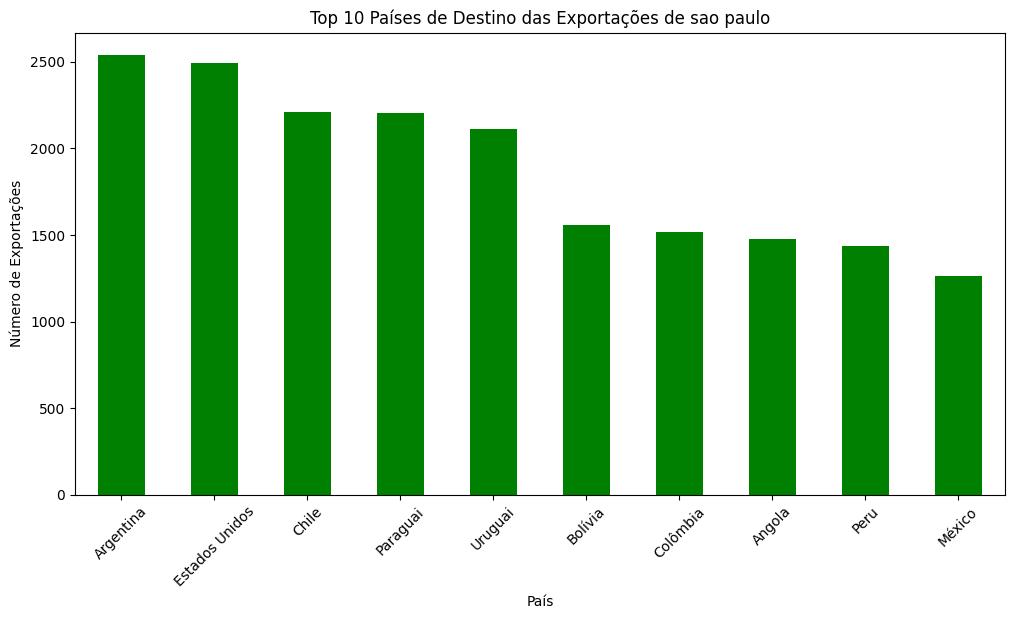

In [2]:
# Escolher o município de interesse (exemplo: 'SAO PAULO')
municipio_especifico = input("Digite o nome do município: ")

df_municipio = df_mescla[df_mescla["MUN"].str.upper() == municipio_especifico.upper()]

# Contar o número de exportações por país
paises_exportacao = df_municipio["PAIS"].value_counts()

# Selecionar os 10 países mais exportados (se houver pelo menos 10)
top_10_paises = paises_exportacao.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='green')

# Personalizar o gráfico
plt.xlabel("País")
plt.ylabel("Número de Exportações")
plt.title(f"Top 10 Países de Destino das Exportações de {municipio_especifico}")
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


# **Comparação entre Municípios**


Digite o nome do primeiro município: sao paulo
Digite o nome do segundo município: sao jose dos campos


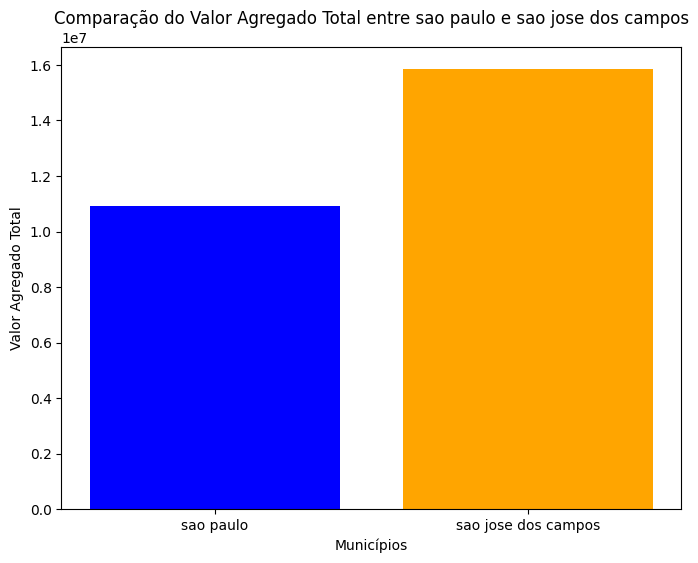

In [3]:
# Escolha os municípios que deseja comparar
municipio1 = input("Digite o nome do primeiro município: ")
municipio2 = input("Digite o nome do segundo município: ")

# Filtrar o DataFrame para os municípios escolhidos
df_municipio1 = df_mescla[df_mescla["MUN"].str.upper() == municipio1.upper()]
df_municipio2 = df_mescla[df_mescla["MUN"].str.upper() == municipio2.upper()]

# Calcular o valor agregado total para cada município
valor_agregado_municipio1 = df_municipio1["VALOR_AGREGADO"].sum()
valor_agregado_municipio2 = df_municipio2["VALOR_AGREGADO"].sum()

# Criar um gráfico de barras para comparar os valores agregados
plt.figure(figsize=(8, 6))
plt.bar([municipio1, municipio2], [valor_agregado_municipio1, valor_agregado_municipio2], color=['blue', 'orange'])
plt.xlabel("Municípios")
plt.ylabel("Valor Agregado Total")
plt.title(f"Comparação do Valor Agregado Total entre {municipio1} e {municipio2}")
plt.show()